Text(0, 0.5, 'Number of counties')

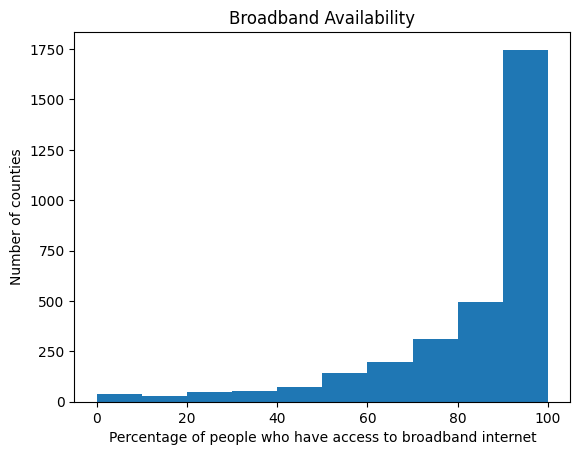

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('povertycsv.csv')

df2 = pd.read_csv('broadband_data_2020October.csv')

#merge the 2 datasets
df_merged = pd.merge(df2, df1, on=['COUNTY ID','COUNTY NAME'])

#convert the poverty percentages to floats
df_merged['Poverty Percent, All Ages'] = pd.to_numeric(df_merged['Poverty Percent, All Ages'])

#create a histogram for the broadband availability
plt.hist(df_merged['BROADBAND PERC'])
plt.title("Broadband Availability")
plt.xlabel("Percentage of people who have access to broadband internet")
plt.ylabel("Number of counties")

Text(0, 0.5, 'Number of counties')

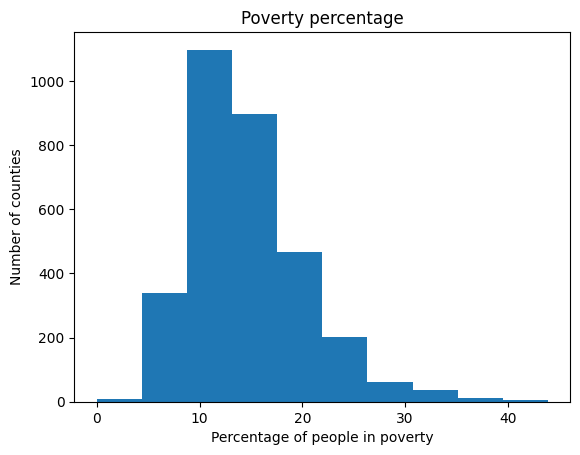

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('povertycsv.csv')

df2 = pd.read_csv('broadband_data_2020October.csv')

#merge the 2 datasets
df_merged = pd.merge(df2, df1, on=['COUNTY ID','COUNTY NAME'])

#convert the poverty percentages to floats
df_merged['Poverty Percent, All Ages'] = pd.to_numeric(df_merged['Poverty Percent, All Ages'])

#create a histogram for the poverty percentage
plt.hist(df_merged['Poverty Percent, All Ages'])
plt.title("Poverty percentage")
plt.xlabel("Percentage of people in poverty")
plt.ylabel("Number of counties")

       BROADBAND PERC  Poverty Percent, All Ages
count     3128.000000                3128.000000
mean        84.010422                  14.609815
std         20.380170                   5.648066
min          0.000000                   0.000000
25%         76.900000                  10.600000
50%         92.400000                  13.600000
75%         98.400000                  17.600000
max        100.000000                  43.900000
Correlation Coefficient: -0.35286508871058625
P-value: 2.195418994114006e-92
Reject the null hypothesis. There is a significant correlation between poverty rate and broadband usage.


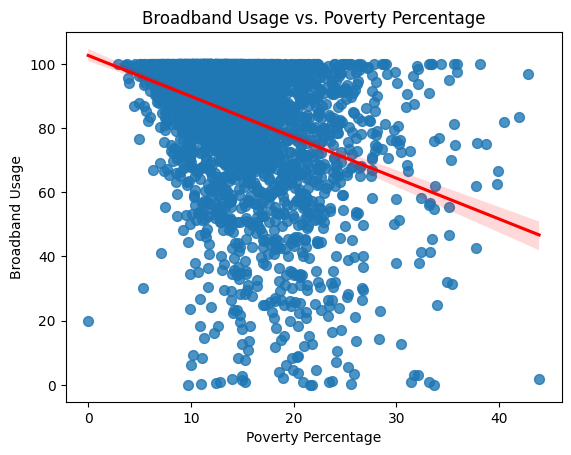

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

df1 = pd.read_csv('povertycsv.csv')

df2 = pd.read_csv('broadband_data_2020October.csv')

#merge the 2 datasets
df_merged = pd.merge(df2, df1, on=['COUNTY ID','COUNTY NAME'])

#convert the poverty percentages to floats
df_merged['Poverty Percent, All Ages'] = pd.to_numeric(df_merged['Poverty Percent, All Ages'])

#scatterplot of broadband internet usage vs poverty percentage accross the US.
sns.regplot(x='Poverty Percent, All Ages', y='BROADBAND PERC', data=df_merged, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Broadband Usage vs. Poverty Percentage')
plt.xlabel('Poverty Percentage')
plt.ylabel('Broadband Usage')

#calculate descriptive statistics to verify data is being processed correctly
descriptive_stats = df_merged[['BROADBAND PERC', 'Poverty Percent, All Ages']].describe()

print(descriptive_stats)

#calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_merged['BROADBAND PERC'], df_merged['Poverty Percent, All Ages'])

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

#perform a p value test
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between poverty rate and broadband usage.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between poverty rate and broadband usage.")





Mean Squared Error: 389.1723494528087


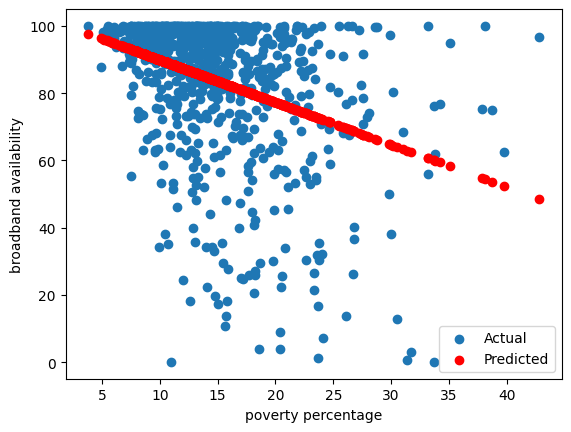

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df1 = pd.read_csv('povertycsv.csv')

df2 = pd.read_csv('broadband_data_2020October.csv')

#merge the 2 datasets
df_merged = pd.merge(df2, df1, on=['COUNTY ID','COUNTY NAME'])

#convert the poverty percentages to floats
df_merged['Poverty Percent, All Ages'] = pd.to_numeric(df_merged['Poverty Percent, All Ages'])

#can we use poverty percentages to predict the availability of broadband internet
X = df_merged[['Poverty Percent, All Ages']]
Y = df_merged['BROADBAND PERC']

#split the data into a training set and a test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

#create the model using the training data
model = LinearRegression()
model.fit(X_train,Y_train)

#predict the outcome given the test data
Y_pred = model.predict(X_test)

#calculate the mean squared error
mse = mean_squared_error(Y_test,Y_pred)

print(f"Mean Squared Error: {mse}")

plt.scatter(X_test['Poverty Percent, All Ages'], Y_test, label='Actual')
plt.scatter(X_test['Poverty Percent, All Ages'], Y_pred, label='Predicted', color='red')
plt.xlabel('poverty percentage')
plt.ylabel('broadband availability')
plt.legend()
plt.show()